In [ ]:
# Use Autoencoder to implement anomaly detection. Build the model by using:
# a. Import required libraries
#b. Upload / access the dataset
#c. Encoder converts it into latent representation
#d. Decoder networks convert it back to the original input
#e. Compile the models with Optimizer, Loss, and Evaluation Metrics

# a. Import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

2024-09-27 12:45:01.041912: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-27 12:45:01.059273: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-27 12:45:01.064281: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-27 12:45:01.077117: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-27 12:45:01.855053: W tensorflow/compiler/tf2

# b. Upload / access the dataset

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data: normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Select only the "1" digit as normal data for training
normal_data = x_train[y_train == 1]

In [3]:
# Define the Autoencoder architecture
input_dim = normal_data.shape[1]
encoding_dim = 32  # Dimension of the latent representation

# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)

In [4]:
# Decoder
decoder = Dense(input_dim, activation='sigmoid')(encoder)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Separate the encoder model for anomaly detection
encoder_model = Model(inputs=input_layer, outputs=encoder)

In [5]:
# Compile the autoencoder
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the autoencoder on the normal data
autoencoder.fit(normal_data, normal_data, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2242 - val_loss: 0.1214
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0854 - val_loss: 0.0318
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0306 - val_loss: 0.0248
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0249 - val_loss: 0.0208
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0213 - val_loss: 0.0185
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0189 - val_loss: 0.0170
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0174 - val_loss: 0.0159
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0164 - val_loss: 0.0150
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0155 - val_loss: 0.0143
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0150 - val_loss: 0.0138
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143 - val_loss: 0.0134
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0140 - val_lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step


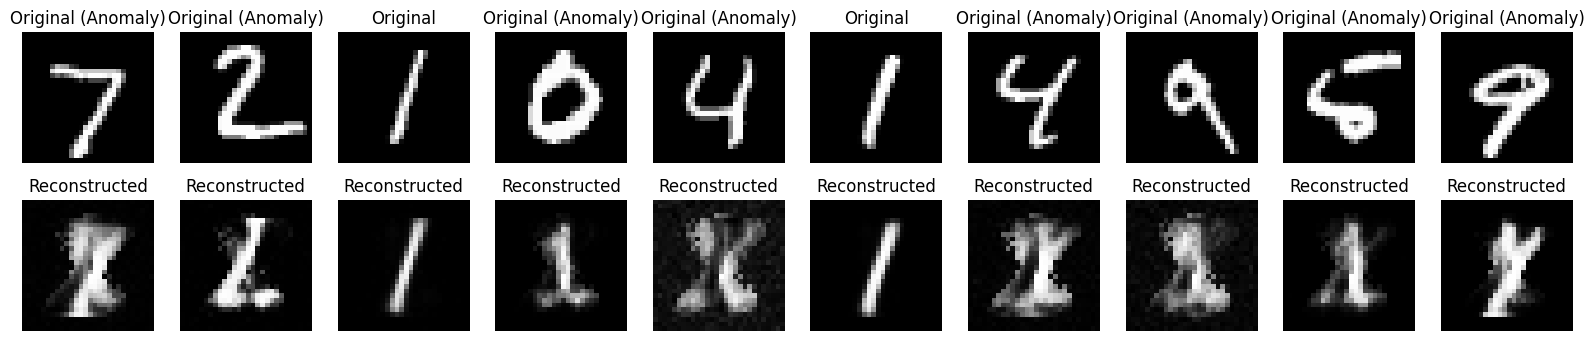

In [6]:
# Predict on the test data
reconstructed = autoencoder.predict(x_test)

# Compute reconstruction error
mse = np.mean(np.power(x_test - reconstructed, 2), axis=1)

# Set a threshold for anomaly detection (this can be adjusted)
threshold = 0.01

# Identify anomalies
anomalies = mse > threshold

# Visualize some results
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original" + (" (Anomaly)" if anomalies[i] else ""))
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()